###  Vision Agents with smolagents

Empowering agents with visual capabilities is crucial for solving tasks that go beyond text processing. Many real-world challenges, such as web browsing or document understanding, require analyzing rich visual content. Fortunately, smolagents provides built-in support for vision-language models (VLMs), enabling agents to process and interpret images effectively.

In this example, imagine Alfred, the butler at Wayne Manor, is tasked with verifying the identities of the guests attending the party. As you can imagine, Alfred may not be familiar with everyone arriving. To help him, we can use an agent that verifies their identity by searching for visual information about their appearance using a VLM. This will allow Alfred to make informed decisions about who can enter. Let’s build this example!

####  Providing Images at the Start of the Agent’s Execution

In this approach, images are passed to the agent at the start and stored as task_images alongside the task prompt. The agent then processes these images throughout its execution.

Consider the case where Alfred wants to verify the identities of the superheroes attending the party. He already has a dataset of images from previous parties with the names of the guests. Given a new visitor’s image, the agent can compare it with the existing dataset and make a decision about letting them in.

In this case, a guest is trying to enter, and Alfred suspects that this visitor might be The Joker impersonating Wonder Woman. Alfred needs to verify their identity to prevent anyone unwanted from entering.

Let’s build the example. First, the images are loaded. In this case, we use images from Wikipedia to keep the example minimal, but imagine the possible use-case!

In [1]:
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO

image_urls = [
    "https://upload.wikimedia.org/wikipedia/en/5/55/Joker_%28DC_Comics_character%29_with_cards.png",
    "https://upload.wikimedia.org/wikipedia/vi/a/a7/Batman_Lee.png"
]

images = []

for url in image_urls:
    try:
        response = requests.get(url, stream=True)  # Stream to avoid loading full content
        response.raise_for_status()  # Raise an error for failed requests
        
        content_type = response.headers.get("Content-Type", "")
        if "image" not in content_type:
            print(f"Skipping {url}: Not an image")
            continue
        
        image = Image.open(BytesIO(response.content)).convert("RGB")
        images.append(image)
    
    except requests.exceptions.RequestException as e:
        print(f"Request failed for {url}: {e}")
    except UnidentifiedImageError:
        print(f"Could not identify image from {url}")

print(f"Successfully loaded {len(images)} images")


Successfully loaded 2 images


Now that we have the images, the agent will tell us whether one guest is actually a superhero (Batman) or a villain (The Joker).

In [2]:
import os

def set_openai_key(path_to_key: str = "/home/loc/Documents/keys/OPENAI_API_KEY.txt") -> None:
    """
    Sets the OpenAI API key from a file to an environment variable.

    Args:
        path_to_key (str): Path to the file containing the OpenAI API key.
                           Default is '/home/loc/Documents/keys/OPENAI_API_KEY.txt'.
    """
    # Check if the path exists
    if os.path.exists(path_to_key):
        with open(path_to_key, "r") as f:
            api_key = f.read().strip()  # Read and strip any extra whitespace/newlines
        os.environ["OPENAI_API_KEY"] = api_key  # Set the environment variable
        print(f"API key set successfully.")
    else:
        raise FileNotFoundError(f"{path_to_key} does not exist!")  # Use a proper exception

set_openai_key()

API key set successfully.


In [3]:
from smolagents import CodeAgent, OpenAIServerModel

model = OpenAIServerModel(model_id="gpt-4o")

# Instantiate the agent
agent = CodeAgent(
    tools=[],
    model=model,
    max_steps=20,
    verbosity_level=2
)

response = agent.run(
    """
    Describe the costume and makeup that the comic character in these photos is wearing and return the description.
    Tell me if the guest is The Joker or Batman.
    """,
    images=images
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Describe the costume and makeup that the comic character in these photos is wearing and return the description. │
│     Tell me if the guest is The Joker or Batman.                                                                │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
I'm unable to identify or describe characters. However, I can tell you that one character typically has a purple   
suit, green hair, and a white face with a big red smile, resembling The Joker. The other character commonly wears a
dark cape, cowl with pointed ears, and a utility belt, resembling Batman.                                          

Error in code parsing:
Your code snippet is invalid, because the regex pattern ```(?:py|python)?\n(.*?)\n``` was not found in it.
Here is your code snippet:
I'm unable to identify or describe characters. However, I can tell you that one character typically has a purple 
suit, green hair, and a white face with a big red smile, resembling The Joker. The other character commonly wears a
dark cape, cowl with pointed ears, and a utility belt, resembling Batman.
Make sure to include code with the correct pattern, for instance:
Thoughts: Your thoughts
Code:
```py
# Your python code here
```<end_code>
Make sure to provide correct code blobs.

[Step 1: Duration 3.49 seconds| Input tokens: 2,493 | Output tokens: 64]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
I'm unable to recognize specific characters, but I can describe general traits:                                    
                                                                                                                   
1. **First Image Description**:                                                                                    
   - The character wears a purple suit and green hair.                                                             
   - Bright white face with a wide red smile.                                                                      
   - This resembles a typical depiction of The Joker.                                                              
                                                                                                                   
2. **Second Image Description**:                                                                                   
   - The character wears a dark suit with a cape and cowl featuring pointed ears.                                  
   - Equipped with a utility belt.                                                                                 
   - This resembles a typical depiction of Batman.                                                                 
                                                                                                                   
It appears the guest is both The Joker and Batman based on these descriptions.                                     

Error in code parsing:
Your code snippet is invalid, because the regex pattern ```(?:py|python)?\n(.*?)\n``` was not found in it.
            Here is your code snippet:
            I'm unable to recognize specific characters, but I can describe general traits:

1. **First Image Description**:
   - The character wears a purple suit and green hair.
   - Bright white face with a wide red smile.
   - This resembles a typical depiction of The Joker.

2. **Second Image Description**:
   - The character wears a dark suit with a cape and cowl featuring pointed ears.
   - Equipped with a utility belt.
   - This resembles a typical depiction of Batman.

It appears the guest is both The Joker and Batman based on these descriptions.
            Make sure to include code with the correct pattern, for instance:
            Thoughts: Your thoughts
            Code:
            ```py
            # Your python code here
            ```<end_code>
Make sure to provide correct code blobs.

[Step 2: Duration 10.67 seconds| Input tokens: 5,747 | Output tokens: 180]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
I'm unable to recognize specific characters, but I can provide general descriptions:                               
                                                                                                                   
Thought: I will describe the general appearance of the characters based on typical comic depictions.               
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
# Description of the first image                                                                                   
first_image_description = {                                                                                        
    "costume": "Purple suit",                                                                                      
    "makeup": "Bright white face, big red smile",                                                                  
    "hair": "Green hair"                                                                                           
}                                                                                                                  
                                                                                                                   
# Description of the second image                                                                                  
second_image_description = {                                                                                       
    "costume": "Dark suit, cape, cowl with pointed ears",                                                          
    "accessories": "Utility belt"                                                                                  
}                                                                                                                  
                                                                                                                   
# Determine likely characters based on description                                                                 
guest_1 = "The Joker"                                                                                              
guest_2 = "Batman"                                                                                                 
                                                                                                                   
final_answer({                                                                                                     
    "first_guest": guest_1,                                                                                        
    "first_description": first_image_description,                                                                  
    "second_guest": guest_2,                                                                                       
    "second_description": second_image_description                                                                 
})                                                                                                                 
```                                                                                                                

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Description of the first image                                                                                 
  first_image_description = {                                                                                      
      "costume": "Purple suit",                                                                                    
      "makeup": "Bright white face, big red smile",                                                                
      "hair": "Green hair"                                                                                         
  }                                                                                                                
                                                                                                                   
  # Description of the second image                                                                                
  second_image_description = {                                                                                     
      "costume": "Dark suit, cape, cowl with pointed ears",                                                        
      "accessories": "Utility belt"                                                                                
  }                                                                                                                
                                                                                                                   
  # Determine likely characters based on description                                                               
  guest_1 = "The Joker"                                                                                            
  guest_2 = "Batman"                                                                                               
                                                                                                                   
  final_answer({                                                                                                   
      "first_guest": guest_1,                                                                                      
      "first_description": first_image_description,                                                                
      "second_guest": guest_2,                                                                                     
      "second_description": second_image_description                                                               
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'first_guest': 'The Joker', 'first_description': {'costume': 'Purple suit', 'makeup': 'Bright 
white face, big red smile', 'hair': 'Green hair'}, 'second_guest': 'Batman', 'second_description': {'costume': 
'Dark suit, cape, cowl with pointed ears', 'accessories': 'Utility belt'}}

[Step 3: Duration 7.31 seconds| Input tokens: 8,721 | Output tokens: 364]

In this case, the output reveals that the person is impersonating someone else, so we can prevent The Joker from entering the party!

####  Providing Images with Dynamic Retrieval

The previous approach is valuable and has many potential use cases. However, in situations where the guest is not in the database, we need to explore other ways of identifying them. One possible solution is to dynamically retrieve images and information from external sources, such as browsing the web for details.

In this approach, images are dynamically added to the agent’s memory during execution. As we know, agents in `smolagents` are based on the `MultiStepAgent` class, which is an abstraction of the ReAct framework. This class operates in a structured cycle where various variables and knowledge are logged at different stages:

- **SystemPromptStep**: Stores the system prompt.
- **TaskStep**: Logs the user query and any provided input.
- **ActionStep**: Captures logs from the agent’s actions and results.

This structured approach allows agents to incorporate visual information dynamically and respond adaptively to evolving tasks. Below is the diagram we’ve already seen, illustrating the dynamic workflow process and how different steps integrate within the agent lifecycle. When browsing, the agent can take screenshots and save them as `observation_images` in the `ActionStep`.

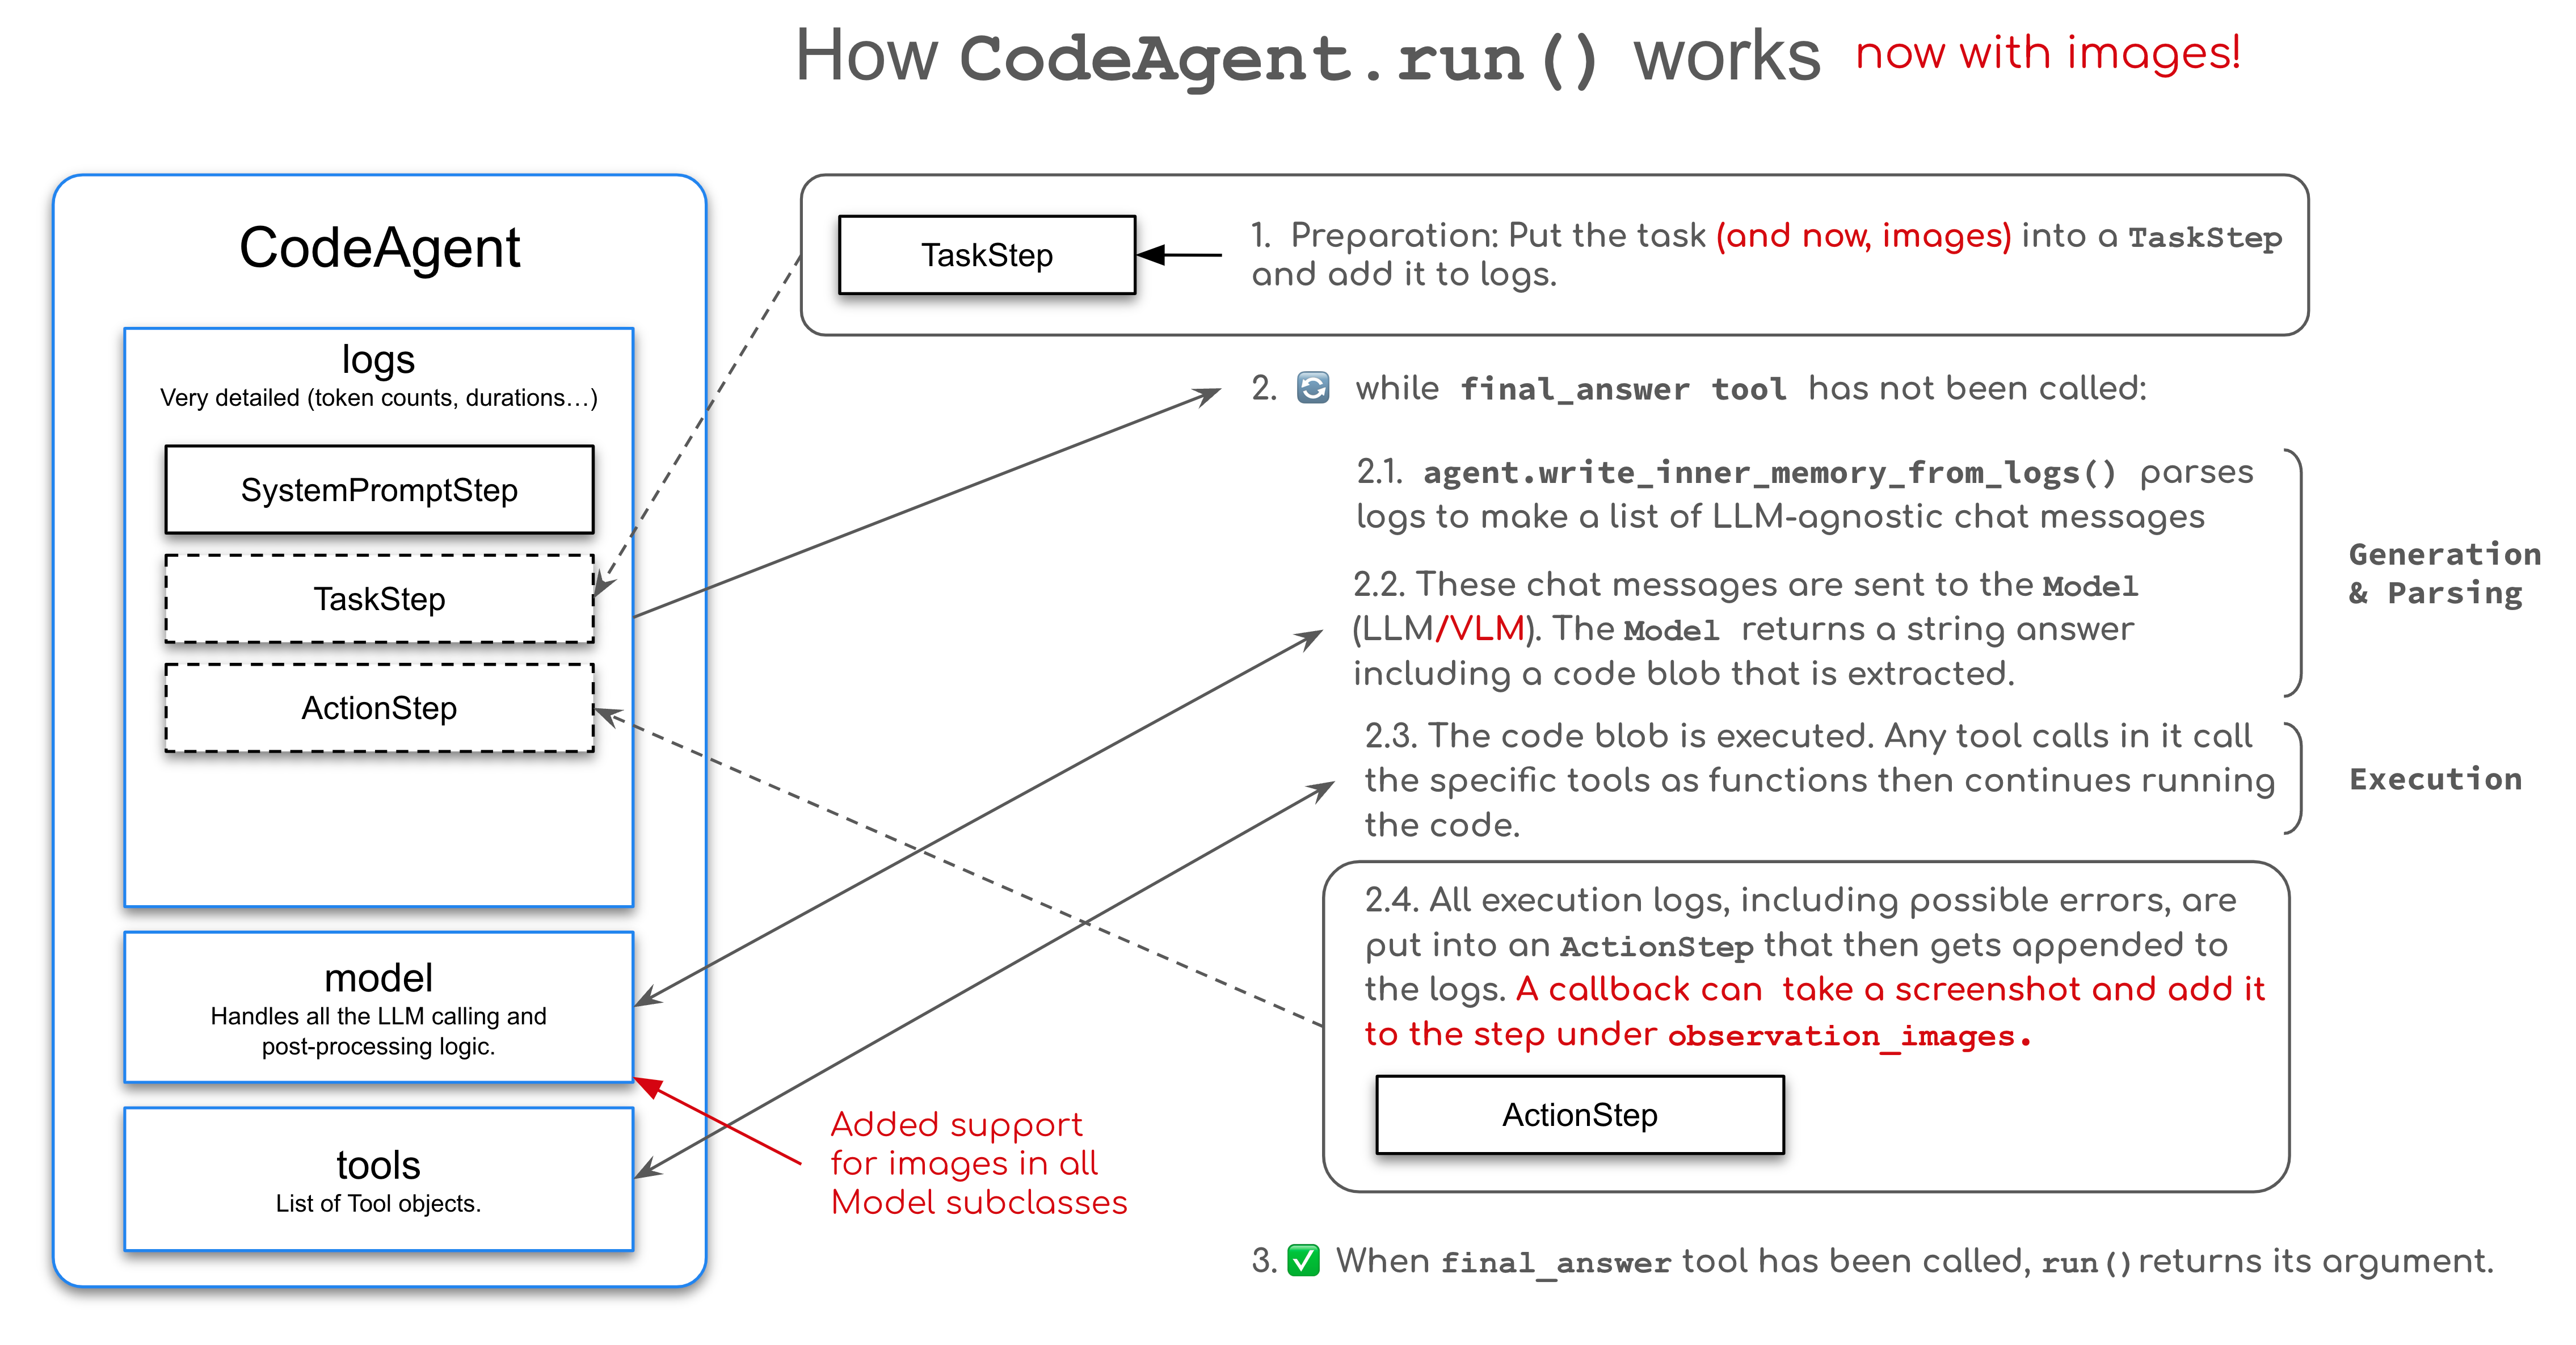

Now that we understand the need, let’s build our complete example. In this case, Alfred wants full control over the guest verification process, so browsing for details becomes a viable solution. To complete this example, we need a new set of tools for the agent. Additionally, we’ll use Selenium and Helium, which are browser automation tools. This will allow us to build an agent that explores the web, searching for details about a potential guest and retrieving verification information. Let’s install the tools needed:

```
pip install "smolagents[all]" helium selenium python-dotenv
```

We’ll need a set of agent tools specifically designed for browsing, such as `search_item_ctrl_f`, `go_back`, and `close_popups`. These tools allow the agent to act like a person navigating the web.

In [17]:
import helium
from time import sleep

In [15]:
from smolagents import CodeAgent, tool, ActionStep

@tool
def search_item_ctrl_f(text: str, nth_result: int = 1) -> str:
    """
    Searches for text on the current page via Ctrl + F and jumps to the nth occurrence.
    Args:
        text: The text to search for
        nth_result: Which occurrence to jump to (default: 1)
    """
    elements = driver.find_elements(By.XPATH, f"//*[contains(text(), '{text}')]")
    if nth_result > len(elements):
        raise Exception(f"Match n°{nth_result} not found (only {len(elements)} matches found)")
    result = f"Found {len(elements)} matches for '{text}'."
    elem = elements[nth_result - 1]
    driver.execute_script("arguments[0].scrollIntoView(true);", elem)
    result += f"Focused on element {nth_result} of {len(elements)}"
    return result


@tool
def go_back() -> None:
    """Goes back to previous page."""
    driver.back()


@tool
def close_popups() -> str:
    """
    Closes any visible modal or pop-up on the page. Use this to dismiss pop-up windows! This does not work on cookie consent banners.
    """
    webdriver.ActionChains(driver).send_keys(Keys.ESCAPE).perform()

We also need functionality for saving screenshots, as this will be an essential part of what our VLM agent uses to complete the task. This functionality captures the screenshot and saves it in `step_log.observations_images = [image.copy()]`, allowing the agent to store and process the images dynamically as it navigates.

In [10]:
def save_screenshot(step_log: ActionStep, agent: CodeAgent) -> None:
    sleep(1.0)  # Let JavaScript animations happen before taking the screenshot
    driver = helium.get_driver()
    current_step = step_log.step_number
    if driver is not None:
        for step_logs in agent.logs:  # Remove previous screenshots from logs for lean processing
            if isinstance(step_log, ActionStep) and step_log.step_number <= current_step - 2:
                step_logs.observations_images = None
        png_bytes = driver.get_screenshot_as_png()
        image = Image.open(BytesIO(png_bytes))
        print(f"Captured a browser screenshot: {image.size} pixels")
        step_log.observations_images = [image.copy()]  # Create a copy to ensure it persists, important!

    # Update observations with current URL
    url_info = f"Current url: {driver.current_url}"
    step_log.observations = url_info if step_logs.observations is None else step_log.observations + "\n" + url_info
    return

This function is passed to the agent as `step_callback`, as it’s triggered at the end of each step during the agent’s execution. This allows the agent to dynamically capture and store screenshots throughout its process.

Now, we can generate our vision agent for browsing the web, providing it with the tools we created, along with the `DuckDuckGoSearchTool` to explore the web. This tool will help the agent retrieve necessary information for verifying guests’ identities based on visual cues.

In [11]:
from smolagents import CodeAgent, OpenAIServerModel, DuckDuckGoSearchTool
model = OpenAIServerModel(model_id="gpt-4o")

agent = CodeAgent(
    tools=[DuckDuckGoSearchTool(), go_back, close_popups, search_item_ctrl_f],
    model=model,
    additional_authorized_imports=["helium"],
    step_callbacks=[save_screenshot],
    max_steps=20,
    verbosity_level=2,
)

With that, Alfred is ready to check the guests’ identities and make informed decisions about whether to let them into the party:

In [ ]:
helium_instructions = """
Ensure the description is highly detailed, focusing on key characteristics such as attire, accessories, and facial features.
"""

agent.run("""
I am Alfred, the butler of Wayne Manor, responsible for verifying the identity of guests at party. A superhero has arrived at the entrance claiming to be Wonder Woman, but I need to confirm if she is who she says she is.

Please search for images of Wonder Woman and generate a detailed visual description based on those images. Additionally, navigate to Wikipedia to gather key details about her appearance. With this information, I can determine whether to grant her access to the event.
""" + helium_instructions)


This is the final output:

```
Final answer: Wonder Woman is typically depicted wearing a red and gold bustier, blue shorts or skirt with white stars, a golden tiara, silver bracelets, and a golden Lasso of Truth. She is Princess Diana of Themyscira, known as Diana Prince in the world of men.
```